In [4]:
import pandas as pd

In [ ]:
#for reading  a dataframe there is a function called read_csv

In [6]:
df=pd.read_csv('LoanApprovalPrediction.csv')

In [7]:
#For viewing the dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
df['ApplicantIncome'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
593    False
594    False
595    False
596    False
597    False
Name: ApplicantIncome, Length: 598, dtype: bool

In [8]:
feature_names=df.columns

In [11]:
feature_names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<ipython-input-22-6314c7f99b02>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


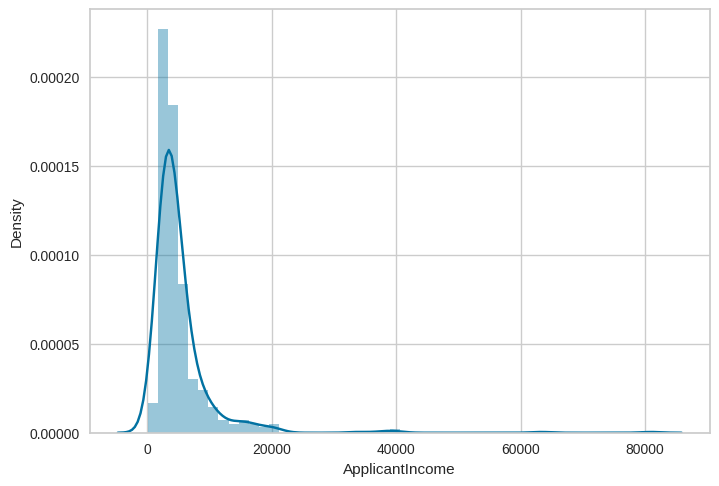

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['ApplicantIncome'])
plt.show()

In [15]:
df['Loan_Status'].value_counts()

Y    411
N    187
Name: Loan_Status, dtype: int64

In [16]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 69.0 MB/s eta 0:0

In [32]:
from pycaret.classification import *


In [33]:
#df, target='dependent_feature',
s=setup(df,target='Loan_Status',fix_imbalance=True,transformation=True,
        normalize=True, ignore_features=['Loan_ID'],session_id=123)

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(598, 13)"
5,Transformed data shape,"(754, 14)"
6,Transformed train set shape,"(574, 14)"
7,Transformed test set shape,"(180, 14)"
8,Ignore features,1
9,Ordinal features,4


In [34]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7990,0.7644,0.9475,0.7988,0.8663,0.4725,0.5052,0.4890
ridge,Ridge Classifier,0.7941,0.0000,0.9371,0.7991,0.8620,0.4659,0.4937,0.3900
rf,Random Forest Classifier,0.7870,0.7778,0.9197,0.8016,0.8550,0.4568,0.4874,1.1600
lr,Logistic Regression,0.7869,0.7624,0.9160,0.8021,0.8550,0.4595,0.4757,1.0640
gbc,Gradient Boosting Classifier,0.7749,0.7625,0.8986,0.7988,0.8447,0.4368,0.4563,0.9950
nb,Naive Bayes,0.7702,0.7647,0.8812,0.8033,0.8399,0.4340,0.4432,0.4390
lightgbm,Light Gradient Boosting Machine,0.7631,0.7665,0.8745,0.8006,0.8350,0.4164,0.4259,1.3320
xgboost,Extreme Gradient Boosting,0.7607,0.7669,0.8571,0.8078,0.8309,0.4212,0.4261,0.6610
ada,Ada Boost Classifier,0.7585,0.7445,0.8643,0.8012,0.8309,0.4105,0.4166,1.0900
et,Extra Trees Classifier,0.7533,0.7670,0.8633,0.7947,0.8262,0.3990,0.4092,1.1690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [35]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
rf_base_model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8395,0.9310,0.8182,0.8710,0.5130,0.5290
1,0.7857,0.7798,0.9310,0.7941,0.8571,0.4392,0.4622
2,0.7857,0.7732,1.0000,0.7632,0.8657,0.3803,0.4846
3,0.7857,0.7626,0.8966,0.8125,0.8525,0.4646,0.4722
4,0.8095,0.7520,0.8966,0.8387,0.8667,0.5346,0.5383
5,0.7857,0.7785,0.8966,0.8125,0.8525,0.4646,0.4722
6,0.7857,0.7454,0.9310,0.7941,0.8571,0.4392,0.4622
7,0.7381,0.7385,0.9286,0.7429,0.8254,0.3265,0.3614
8,0.8537,0.8887,0.9286,0.8667,0.8966,0.6476,0.6521


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
tuned_rf_model=tune_model(rf_base_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.7692,1.0000,0.8286,0.9062,0.6170,0.6679
1,0.8095,0.6923,1.0000,0.7838,0.8788,0.4633,0.5490
2,0.7857,0.6538,1.0000,0.7632,0.8657,0.3803,0.4846
3,0.8333,0.7308,1.0000,0.8056,0.8923,0.5421,0.6097
4,0.8333,0.7308,1.0000,0.8056,0.8923,0.5421,0.6097
5,0.8571,0.7692,1.0000,0.8286,0.9062,0.6170,0.6679
6,0.8095,0.7135,0.9655,0.8000,0.8750,0.4894,0.5298
7,0.7857,0.6786,1.0000,0.7568,0.8615,0.4255,0.5199
8,0.8780,0.8077,1.0000,0.8485,0.9180,0.6861,0.7226


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [39]:
final_rf_model=finalize_model(tuned_rf_model)

In [40]:
final_rf_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Dependents', 'ApplicantIncome',
                                             'CoapplicantIncome', 'LoanAmount',
                                             'Loan_Amount_Term',
                                             'Credit_History'],
                                    transformer=SimpleImputer(ad...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=2,
                                        max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.1,
                                        min_samples_leaf=3, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [41]:
save_model(final_rf_model,'finalised_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Dependents', 'ApplicantIncome',
                                              'CoapplicantIncome', 'LoanAmount',
                                              'Loan_Amount_Term',
                                              'Credit_History'],
                                     transformer=SimpleImputer(ad...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='gini', max_depth=2,
                                         max_features='log2',
                                    

In [23]:
df['Loan_Status'].value_counts()

Y    411
N    187
Name: Loan_Status, dtype: int64